In [1]:
import cv2
import os
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import normalize

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense


In [2]:
image_directory= r"D:\abcdefghj\Projects\Covid_Detection\Brain_Tumor\\"
no_tumor_images=os.listdir(image_directory+"/no")
yes_tumor_images=os.listdir(image_directory+"/yes")
dataset=[]
label=[]

# no_tumor_images
for i, image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no//'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((64,64))
        dataset.append(np.array(image))
        label.append(0)
        
for i, image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes//'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((64,64))
        dataset.append(np.array(image))
        label.append(1)
        
# print(dataset)

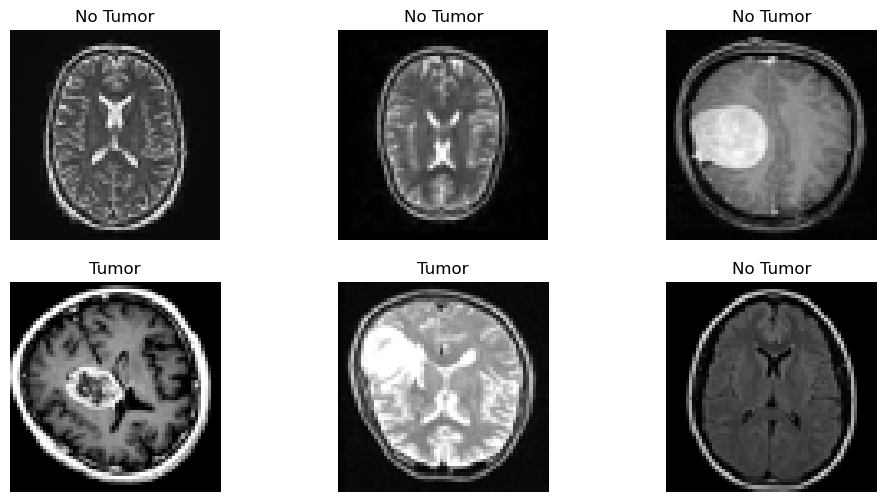

In [6]:
import matplotlib.pyplot as plt
import random

# Assuming you have imported the necessary libraries and loaded the data as shown in your code

# Shuffle the dataset and labels to mix "no tumor" and "tumor" images
combined_data = list(zip(dataset, label))
random.shuffle(combined_data)
data, l = zip(*combined_data)

# Visualize a few sample images from the dataset
plt.figure(figsize=(12, 6))
for i in range(6):  # Display the first 6 images
    plt.subplot(2, 3, i + 1)
    plt.imshow(data[i])
    if label[i] == 0:
        plt.title("No Tumor")
    else:
        plt.title("Tumor")
    plt.axis('off')

plt.show()


In [7]:
dataset=np.array(dataset)
label=np.array(label)

In [8]:
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

print(x_train.shape)

(2400, 64, 64, 3)


In [9]:
x_train= normalize(x_train, axis=1)
x_test= normalize(x_test, axis=1)

In [10]:
model= Sequential()

model.add(Conv2D(32,(3,3), input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=10, validation_data=(x_test, y_test) ,shuffle=False)

Epoch 1/10
150/150 [==============================] - 15s 68ms/step - loss: 0.5594 - accuracy: 0.7237 - val_loss: 0.4573 - val_accuracy: 0.7883
Epoch 2/10
150/150 [==============================] - 9s 57ms/step - loss: 0.4169 - accuracy: 0.8213 - val_loss: 0.3179 - val_accuracy: 0.8633
Epoch 3/10
150/150 [==============================] - 9s 59ms/step - loss: 0.3329 - accuracy: 0.8592 - val_loss: 0.2654 - val_accuracy: 0.8867
Epoch 4/10
150/150 [==============================] - 9s 57ms/step - loss: 0.2720 - accuracy: 0.8875 - val_loss: 0.2217 - val_accuracy: 0.9183
Epoch 5/10
150/150 [==============================] - 9s 60ms/step - loss: 0.2182 - accuracy: 0.9192 - val_loss: 0.1703 - val_accuracy: 0.9350
Epoch 6/10
150/150 [==============================] - 9s 61ms/step - loss: 0.1709 - accuracy: 0.9371 - val_loss: 0.1562 - val_accuracy: 0.9400
Epoch 7/10
150/150 [==============================] - 9s 61ms/step - loss: 0.1242 - accuracy: 0.9567 - val_loss: 0.0951 - val_accuracy: 0.970

In [13]:
from sklearn.metrics import accuracy_score

# Assuming you have a trained CNN model named "model"

# Use the model to predict labels for the test data
y_pred = model.predict(x_test)

# Convert the predicted probabilities to binary labels (0 or 1) if needed
# For example, if your model outputs probabilities, you might round them to the nearest integer.
y_pred = np.round(y_pred).astype(int)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


19/19 [==============================] - 1s 24ms/step
Accuracy: 98.50%


In [54]:
model.save('braintumor.h5')

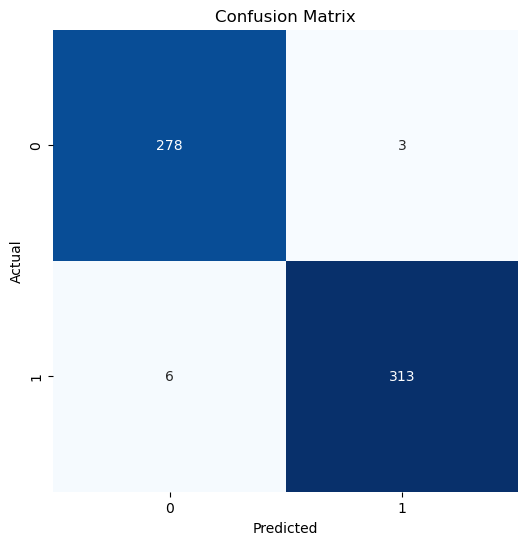

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
TP = conf_matrix[1][1]  # True Positives
TN = conf_matrix[0][0]  # True Negatives
FP = conf_matrix[0][1]  # False Positives
FN = conf_matrix[1][0]
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + TN + FP + FN)
sensitivity =  TP / (TP + FN)
print(accuracy)
print(sensitivity)
print(specificity)

0.985
0.9811912225705329
0.9893238434163701


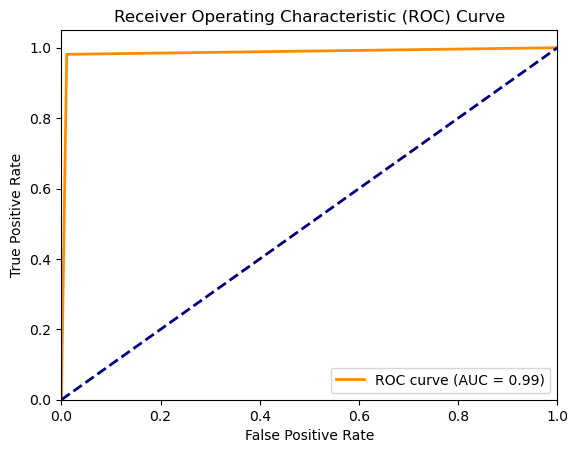

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have true_labels and predicted_probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [72]:
img= cv2.imread(r'D:\abcdefghj\Projects\Covid_Detection\Brain_Tumor\pred\pred39.jpg')
img= Image.fromarray(img)
# print(img)
img=img.resize((64,64))
img=np.array(img)
input=np.expand_dims(img, axis=0)

result= model.predict(input)
print(result)

1/1 [==============================] - 0s 15ms/step
[[1.]]


In [3]:
from tensorflow.keras.models import load_model
model1=load_model('braintumor.h5')


In [8]:
img= cv2.imread(r'C:\Users\dnyan\Downloads\R.png')
img= Image.fromarray(img)
# print(img)
img=img.resize((64,64))
img=np.array(img)
input=np.expand_dims(img, axis=0)

result= model1.predict(input)
print(result)

if result==1:
    print("tumor")

1/1 [==============================] - 0s 159ms/step
[[1.]]
tumor
